> FIAP - Faculdade de informática e administração paulista

# Processamento de linguagem natural - Sprint 01

Desenvolva usando as técnicas aprendidas em aula, um analisador de sentimentos para classificar os comentários recebidos nos serviços prestados no site.

## Integrantes

- Cauã Pinheiro - 98319
- Emilly Oliveira - 97915
- Guilherme Richetto - 550407
- Leonardo Vaidotas - 550700
- Vitor Manzoli - 551551

## Desenvolvimento

Primeiro, vamos importar as bibliotecas e fazer a configuração necessária


In [20]:
%pip install nltk deep-translator matplotlib seaborn 

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [37]:
import nltk

nltk.download("all-corpora")
nltk.download("all-nltk")

[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/cauaspinheiro/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/cauaspinheiro/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |     /home/cauaspinheiro/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/cauaspinheiro/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/cauaspinheiro/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/cauaspinheiro/nltk_data...
[nltk_data]    |   Package brow

'OK'

In [22]:
INPUT_FILE = "generated_feedbacks.json"

In [23]:
import json
import pandas as pd

with open(INPUT_FILE, "r") as file:
    data = json.load(file)

# Inicializar listas para armazenar dados
locations = []
feedbacks = []

# Iterar sobre os dados e coletar informações
for entry in data:
    location = entry["name"]
    for feedback in entry["feedbacks"]:
        locations.append(location)
        feedbacks.append(feedback)

# Criar DataFrame
base_df = pd.DataFrame({"Location": locations, "Feedback": feedbacks})

# Exibir as primeiras linhas do DataFrame
base_df.sample(15)

,Location,Feedback
243,"Poupatempo - Salvador, BA","O suporte técnico fez o básico, resolveram o p..."
343,"Poupatempo - Porto Alegre, RS",Recebi informações erradas do suporte ao clien...
155,"Poupatempo - Recife, PE","O atendimento ao cliente foi satisfatório, mas..."
217,"Poupatempo - Recife, PE","O atendimento ao cliente foi satisfatório, mas..."
42,"Poupatempo - Belo Horizonte, MG",O suporte técnico não resolveu meu problema e ...
214,"Poupatempo - Recife, PE","Fiquei frustrado com o suporte ao cliente, não..."
249,"Poupatempo - Salvador, BA",O suporte ao cliente foi suficiente para resol...
52,"Poupatempo - Curitiba, PR",Fiquei impressionado com a eficiência e a cord...
314,"Poupatempo - Porto Alegre, RS",Fui atendido de forma muito atenciosa e profis...
74,"Poupatempo - Curitiba, PR",O suporte ao cliente foi suficiente para resol...


Vamos traduzir todos os textos para o inglês, assim podemos usar o modelo de análise de sentimentos do NLTK que só funciona com textos em inglês.


In [24]:
from deep_translator import GoogleTranslator

translator = GoogleTranslator(src="pt", dest="en")


def translate(text):
    return translator.translate(text)


df = base_df.copy()

df["feed_en"] = df["Feedback"].apply(translate)

df.sample(15)

,Location,Feedback,feed_en
322,"Poupatempo - Porto Alegre, RS","O atendimento foi péssimo, não recomendo.","The service was terrible, I don't recommend it."
99,"Poupatempo - Curitiba, PR",A equipe de atendimento foi rude e não resolve...,The customer service team was rude and did not...
175,"Poupatempo - Recife, PE","O atendimento foi adequado, mas não se destacou.","The service was adequate, but not outstanding."
246,"Poupatempo - Salvador, BA",O suporte técnico foi demorado e ineficaz.,Technical support was slow and ineffective.
112,"Poupatempo - Curitiba, PR","Fui atendido de forma adequada, mas não excepc...","I was treated adequately, but not exceptionally."
61,"Poupatempo - Curitiba, PR","O suporte técnico fez o básico, resolveram o p...",Technical support did the basics and resolved ...
236,"Poupatempo - Salvador, BA","O atendimento foi adequado, mas não se destacou.","The service was adequate, but not outstanding."
44,"Poupatempo - Belo Horizonte, MG","O atendimento ao cliente foi satisfatório, mas...",Customer service was satisfactory but could be...
79,"Poupatempo - Curitiba, PR","A equipe de suporte foi razoável, resolveram o...","The support team was reasonable, they resolved..."
176,"Poupatempo - Recife, PE","Recebi um atendimento péssimo, não foram nada ...","I received terrible service, they were not pol..."


## Tratando o texto


In [25]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()
stop = stopwords.words("english")
sent = SentimentIntensityAnalyzer()


def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop]

    return " ".join(tokens)


df["feed_en_processed"] = df["feed_en"].apply(preprocess_text)

df.sample(10)

,Location,Feedback,feed_en,feed_en_processed
50,"Poupatempo - Curitiba, PR","O atendimento foi muito ruim, não conseguiram ...","The service was very bad, they couldn't solve ...",service wa bad could solve problem
65,"Poupatempo - Curitiba, PR","O atendimento ao cliente foi satisfatório, mas...",Customer service was satisfactory but could be...,customer service wa satisfactory could improved
249,"Poupatempo - Salvador, BA",O suporte ao cliente foi suficiente para resol...,The customer support was enough to resolve my ...,customer support wa enough resolve query
307,"Poupatempo - Porto Alegre, RS",O suporte técnico demorou muito para responder...,Technical support took a long time to respond ...,technical support took long time respond resol...
146,"Poupatempo - Recife, PE","O atendimento ao cliente foi insatisfatório, n...","The customer service was unsatisfactory, they ...",customer service wa unsatisfactory solve problem
104,"Poupatempo - Curitiba, PR","A equipe foi atenciosa, mas não muito rápida n...","The staff was attentive, but not very quick to...",staff wa attentive quick resolve issue
345,"Poupatempo - Porto Alegre, RS","O suporte técnico foi mediano, resolveram o pr...","The technical support was average, they resolv...",technical support wa average resolved problem ...
265,"Poupatempo - Salvador, BA",O atendimento telefônico foi muito demorado e ...,The telephone service was very slow and ineffi...,telephone service wa slow inefficient
250,"Poupatempo - Salvador, BA","Recebi um atendimento excelente, todos foram m...","I received excellent service, everyone was ver...",received excellent service everyone wa helpful...
312,"Poupatempo - Porto Alegre, RS",O suporte ao cliente foi suficiente para resol...,The customer support was enough to resolve my ...,customer support wa enough resolve query


Baseado no resultado do tratamento, vamos analisar o sentimento do texto sem tratamento, já que tratar o texto acaba por remover palavras que podem ser importantes para a análise de sentimento.


In [26]:
df.drop(columns=["feed_en_processed"], inplace=True)

## Análise de sentimentos


In [27]:
def get_sentiment(text):
    score = sent.polarity_scores(text)

    return score


df["sent"] = df["feed_en"].apply(get_sentiment)

df["pos"] = df["sent"].apply(lambda x: x["pos"])
df["neg"] = df["sent"].apply(lambda x: x["neg"])
df["neu"] = df["sent"].apply(lambda x: x["neu"])
df["compound"] = df["sent"].apply(lambda x: x["compound"])

df.sample(10)

,Location,Feedback,feed_en,sent,pos,neg,neu,compound
213,"Poupatempo - Recife, PE","Fiquei muito insatisfeito com o atendimento, n...","I was very dissatisfied with the service, they...","{'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...",0.000,0.343,0.657,-0.6399
54,"Poupatempo - Curitiba, PR","O atendimento foi um pouco demorado, mas a equ...","Service was a little slow, but the staff was v...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
103,"Poupatempo - Curitiba, PR",O atendimento ao cliente foi rápido e eficient...,"Customer service was quick and efficient, I wa...","{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'comp...",0.457,0.000,0.543,0.7089
261,"Poupatempo - Salvador, BA","O atendimento foi adequado, mas não se destacou.","The service was adequate, but not outstanding.","{'neg': 0.402, 'neu': 0.464, 'pos': 0.135, 'co...",0.135,0.402,0.464,-0.5967
313,"Poupatempo - Porto Alegre, RS","O atendimento foi apressado e pouco atencioso,...","The service was rushed and not very attentive,...","{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'comp...",0.000,0.192,0.808,-0.3343
307,"Poupatempo - Porto Alegre, RS",O suporte técnico demorou muito para responder...,Technical support took a long time to respond ...,"{'neg': 0.137, 'neu': 0.693, 'pos': 0.17, 'com...",0.170,0.137,0.693,0.1321
22,"Poupatempo - Belo Horizonte, MG","O atendimento foi muito ruim, não conseguiram ...","The service was very bad, they couldn't solve ...","{'neg': 0.368, 'neu': 0.478, 'pos': 0.154, 'co...",0.154,0.368,0.478,-0.4814
63,"Poupatempo - Curitiba, PR","Tive uma experiência normal com o atendimento,...","I had a normal experience with the service, no...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
82,"Poupatempo - Curitiba, PR","O atendimento ao cliente foi ok, mas não super...","Customer service was ok, but did not exceed my...","{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...",0.151,0.000,0.849,0.1531
301,"Poupatempo - Salvador, BA","O atendimento ao cliente foi ok, mas não super...","Customer service was ok, but did not exceed my...","{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...",0.151,0.000,0.849,0.1531


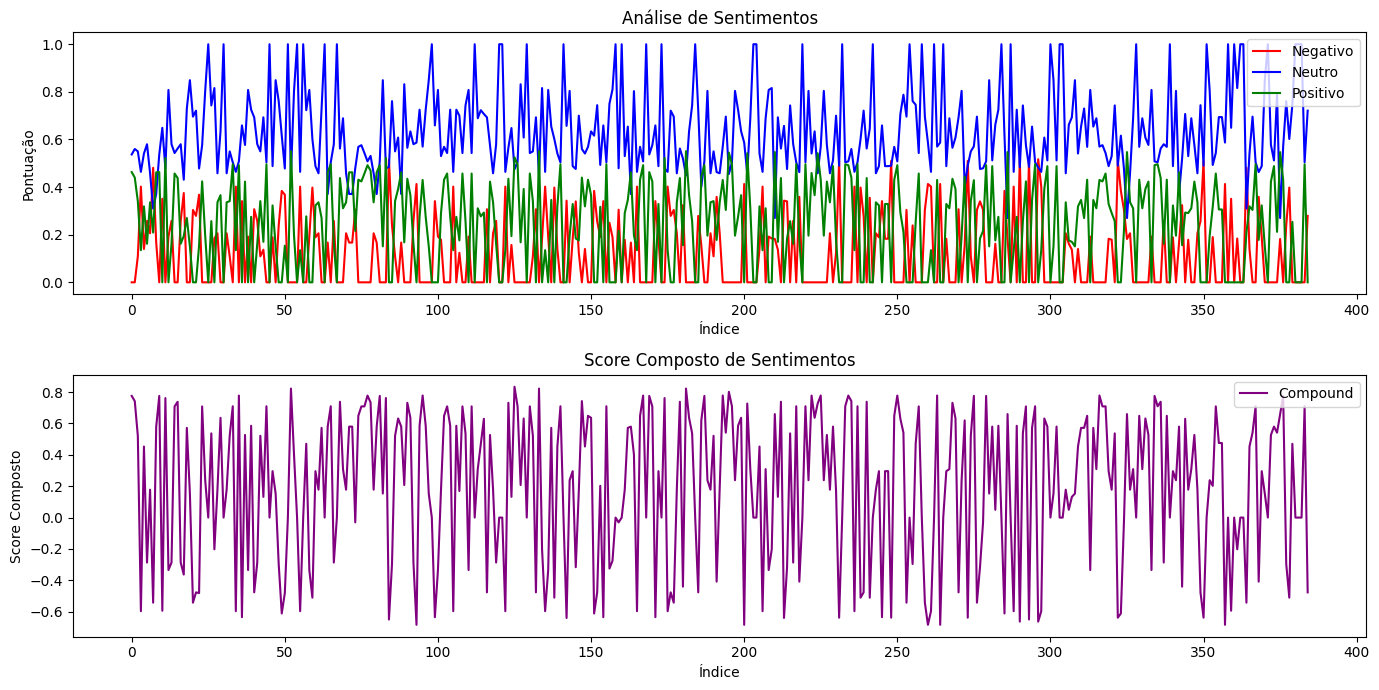

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

sent_scores = pd.DataFrame(df["sent"].tolist())

plt.figure(figsize=(14, 7))


plt.subplot(2, 1, 1)
plt.plot(sent_scores.index, sent_scores["neg"], label="Negativo", color="red")
plt.plot(sent_scores.index, sent_scores["neu"], label="Neutro", color="blue")
plt.plot(sent_scores.index, sent_scores["pos"], label="Positivo", color="green")
plt.title("Análise de Sentimentos")
plt.xlabel("Índice")
plt.ylabel("Pontuação")
plt.legend(loc="upper right")

plt.subplot(2, 1, 2)
plt.plot(sent_scores.index, sent_scores["compound"], label="Compound", color="purple")
plt.title("Score Composto de Sentimentos")
plt.xlabel("Índice")
plt.ylabel("Score Composto")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

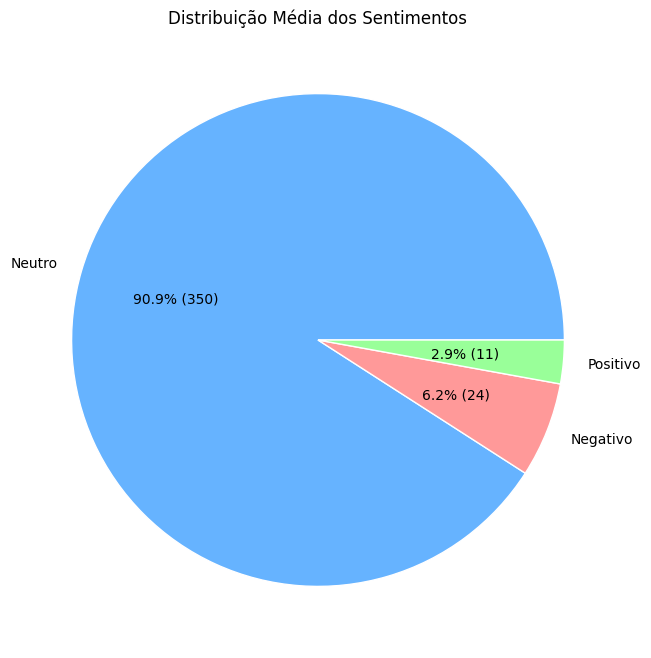

In [29]:
sentiments = sent_scores.drop(columns=["compound"], axis=1)

percentages = sentiments.idxmax(axis=1).value_counts(normalize=True) * 100
quantities = sentiments.idxmax(axis=1).value_counts()

plt.figure(figsize=(8, 8))

colors = ["#66b3ff", "#ff9999", "#99ff99"]


def format_quant(pct):
    total = sum(quantities)

    val = int(round(pct * total / 100.0))

    return f"{pct:.1f}% ({val:d})"


plt.pie(
    percentages,
    labels=["Neutro", "Negativo", "Positivo"],
    autopct=format_quant,
    colors=colors,
    wedgeprops={"edgecolor": "white"},
)
plt.title("Distribuição Média dos Sentimentos")
plt.show()

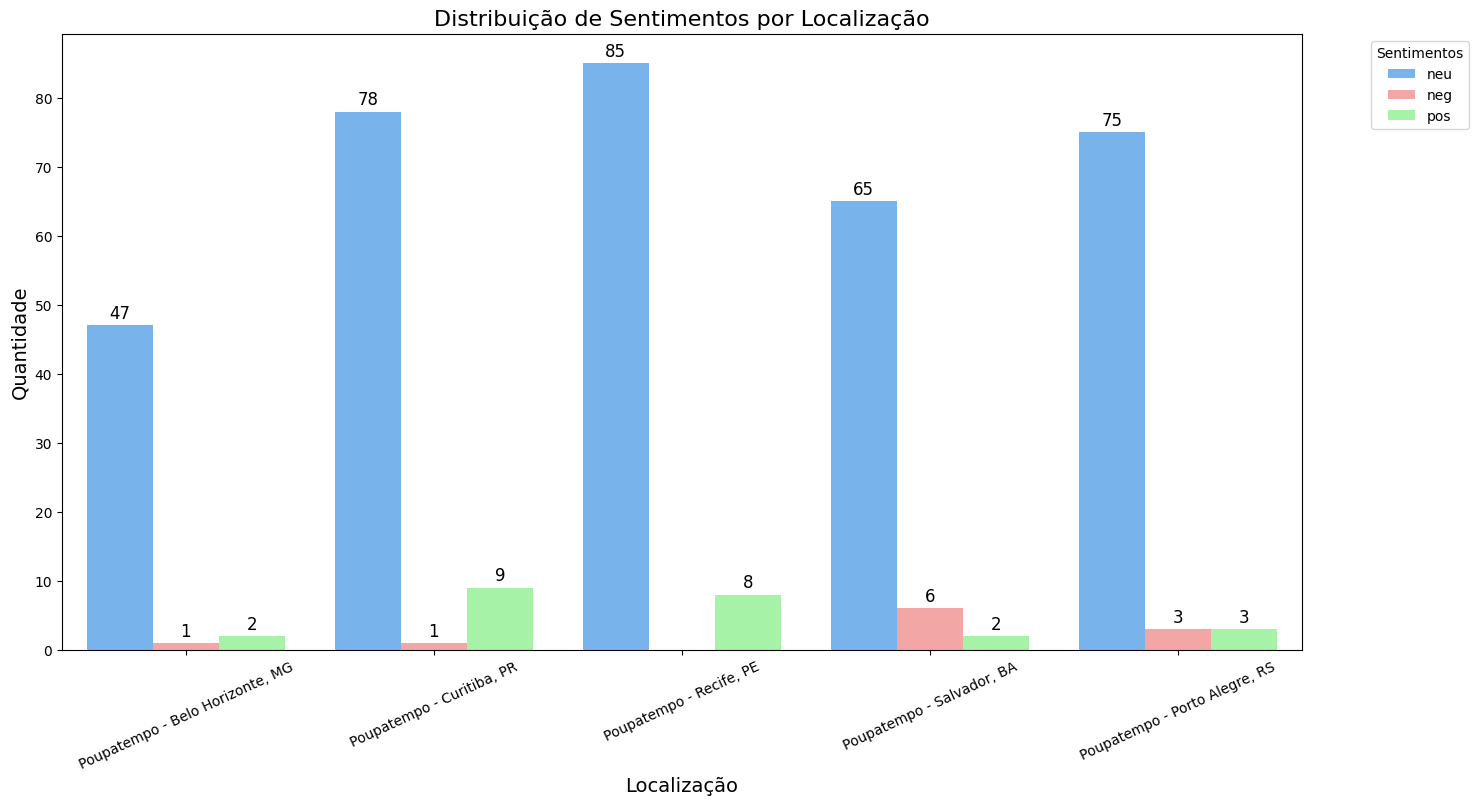

In [30]:
import seaborn as sns

plt.figure(figsize=(16, 8))

ax = sns.countplot(
    data=df,
    x="Location",
    hue=sentiments.idxmax(axis=1),
    palette=sns.color_palette(["#66b3ff", "#ff9999", "#99ff99"]),
)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(
            f"\n{int(p.get_height())}",
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center",
            va="center",
            size=12,
            color="black",
            xytext=(0, 16),
            textcoords="offset points",
        )

plt.xticks(rotation=25, ha="center")

plt.title("Distribuição de Sentimentos por Localização", fontsize=16)

plt.xlabel("Localização", fontsize=14)
plt.ylabel("Quantidade", fontsize=14)

plt.legend(title="Sentimentos", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

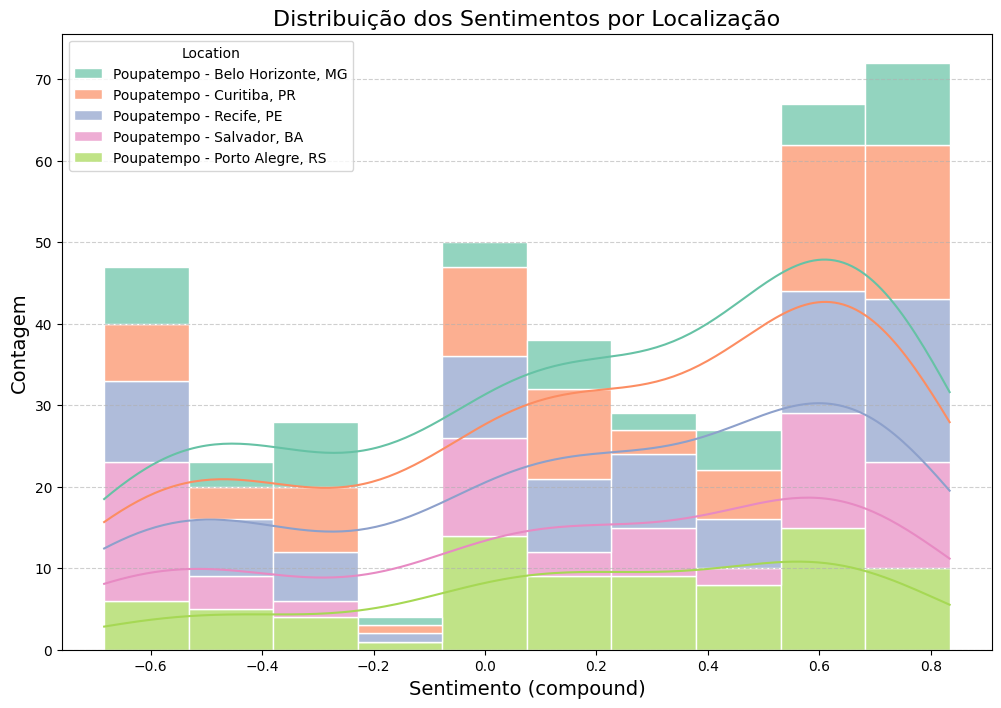

In [31]:
plt.figure(figsize=(12, 8))
sns.histplot(
    data=df,
    x="compound",
    hue="Location",
    kde=True,
    multiple="stack",
    palette="Set2",
    edgecolor="white",
    alpha=0.7,
)
plt.title("Distribuição dos Sentimentos por Localização", fontsize=16)
plt.xlabel("Sentimento (compound)", fontsize=14)
plt.ylabel("Contagem", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

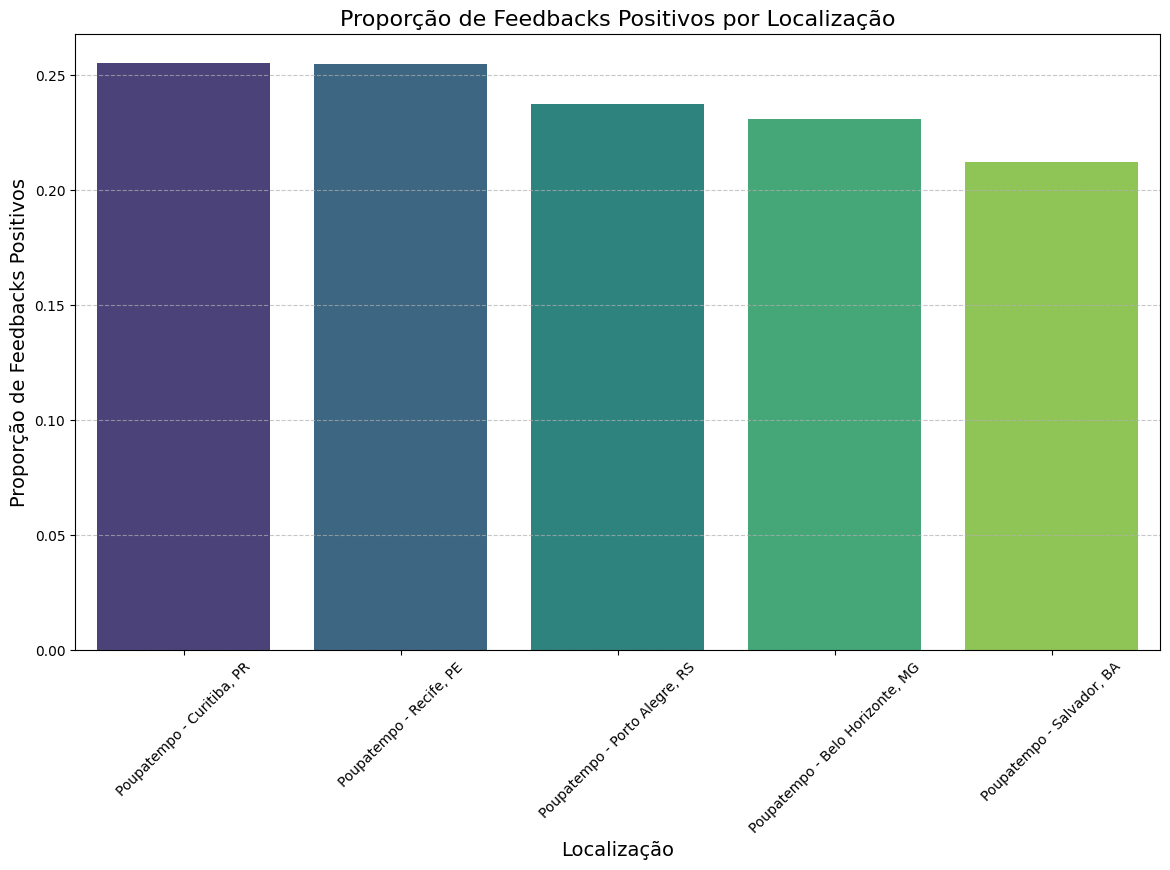

In [32]:
sentiment_counts = df.groupby("Location").agg(
    {"pos": "sum", "neg": "sum", "neu": "sum"}
)

sentiment_counts["total"] = sentiment_counts.sum(axis=1)
sentiment_counts["pos_%"] = sentiment_counts["pos"] / sentiment_counts["total"]

sentiment_counts_sorted = sentiment_counts.sort_values(by="pos_%", ascending=False)

plt.figure(figsize=(14, 8))

ax = sns.barplot(
    x=sentiment_counts_sorted.index,
    y=sentiment_counts_sorted["pos_%"],
    palette="viridis",
    hue=sentiment_counts_sorted.index,
)


plt.xticks(rotation=45, ha="center")
plt.title("Proporção de Feedbacks Positivos por Localização", fontsize=16)
plt.xlabel("Localização", fontsize=14)
plt.ylabel("Proporção de Feedbacks Positivos", fontsize=14)


plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

## Popularidade das palavras

Vamos analisar a popularidade das palavras nos textos, com isso, podemos ter uma ideia do que os clientes estão falando.

Basicamente, vamos contar a quantidade de vezes que cada palavra aparece nos textos e depois mostrar os textos que contém essas palavras.


In [33]:
from nltk import FreqDist

stop_pt = stopwords.words("portuguese")

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_pt]

    return tokens


freq_dist = FreqDist()

for feedback in df["Feedback"]:
    tokens = preprocess_text(feedback)
    freq_dist.update(tokens)

for word, freq in freq_dist.most_common(20):
    print(f"{word}: {freq}")

atendimento: 235
suporte: 102
equipe: 95
cliente: 81
problema: 74
eficiente: 50
técnico: 47
resolveram: 40
resolveu: 39
pouco: 39
poderia: 38
fiquei: 34
atendido: 33
recebi: 32
nada: 30
dúvidas: 26
satisfatório: 25
atenciosa: 24
bom: 23
problemas: 22


In [36]:
# Pegue os comentários que mais tem as palavras mais comuns
common_words = [word for word, _ in freq_dist.most_common(20)]

common_comments = []

for feedback in df["Feedback"]:
    tokens = preprocess_text(feedback)

    quant_common = sum([1 for token in tokens if token in common_words])

    if quant_common > 0:
        common_comments.append((feedback, quant_common))

common_comments_df = pd.DataFrame(common_comments, columns=["Feedback", "Common Words"])

common_comments_df.sort_values(by="Common Words", ascending=False, inplace=True)

common_comments_df.drop_duplicates(inplace=True)

pd.set_option('display.max_colwidth', None)

common_comments_df.head(10)

,Feedback,Common Words
0,A equipe de suporte técnico foi muito eficiente e resolveu meu problema rapidamente.,6
145,"Fiquei frustrado com o suporte ao cliente, não resolveram nada.",5
272,O suporte técnico foi muito eficiente e resolveu meu problema na hora.,5
279,A equipe de suporte foi muito eficiente e resolveu meu problema rapidamente.,5
285,"Fiquei frustrado com o atendimento ao cliente, não resolveram nada.",5
131,O suporte técnico foi muito demorado e não resolveu meu problema.,4
191,"A equipe de suporte não foi nada prestativa, atendimento ruim.",4
201,O suporte ao cliente foi rápido e resolveu minhas dúvidas com eficiência.,4
209,A equipe de atendimento foi indiferente e pouco atenciosa.,4
117,"O suporte ao cliente foi mediano, resolveram minhas dúvidas.",4
